In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
pert_results = pd.read_csv('results/perturbation_results.csv')

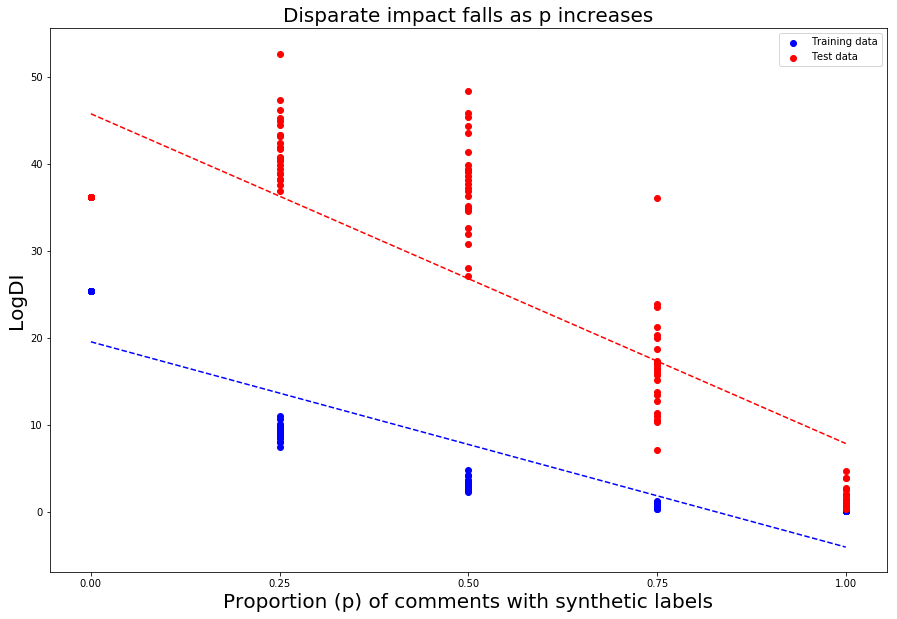

In [33]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(pert_results['p'], pert_results['logDI_train'], c='b', label='Training data')
z_train = np.polyfit(pert_results['p'], pert_results['logDI_train'], 1)
p_train = np.poly1d(z_train)
ax1.plot(pert_results['p'], p_train(pert_results['p']), "b--")

ax1.scatter(pert_results['p'], pert_results['logDI_test'], c='r', label='Test data')
z_test = np.polyfit(pert_results['p'], pert_results['logDI_test'], 1)
p_test = np.poly1d(z_test)
ax1.plot(pert_results['p'], p_test(pert_results['p']), "r--")

plt.xticks(np.arange(0, 1.25, 0.25))
plt.title("Disparate impact falls as p increases", fontsize=20)
plt.xlabel("Proportion (p) of comments with synthetic labels", fontsize=20)
plt.ylabel("LogDI", fontsize=20)
plt.legend()
plt.savefig('figures/perturbations_graph1206.png', bbox_inches='tight')

plt.show()

In [3]:
pert_results.head()

,Unnamed: 0,p,logDI_train,logDI_test
0,0,0.0,25.3993,36.212228
1,1,0.0,25.3993,36.212228
2,2,0.0,25.3993,36.212228
3,3,0.0,25.3993,36.212228
4,4,0.0,25.3993,36.212228


In [14]:
pert_results[(pert_results.p > 0) & (pert_results.p < 1)].head()

,Unnamed: 0,p,logDI_train,logDI_test
25,25,0.25,10.620912,45.219664
26,26,0.25,9.266180,38.871566
27,27,0.25,9.370124,40.584482
28,28,0.25,8.516764,44.906993
29,29,0.25,9.694544,39.790125


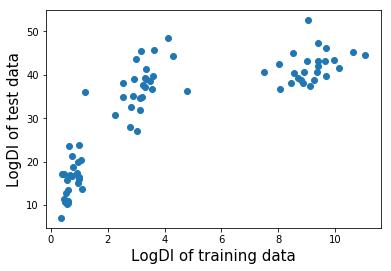

In [17]:
plt.figsize=(15,10)
plt.scatter(pert_results[(pert_results.p > 0) & (pert_results.p < 1)].logDI_train, \
            pert_results[(pert_results.p > 0) & (pert_results.p < 1)].logDI_test)

# plt.title("", fontsize=20)
plt.xlabel("LogDI of training data", fontsize=15)
plt.ylabel("LogDI of test data", fontsize=15)
plt.savefig('figures/logDItrainvstest', bbox_inches='tight')

plt.show()

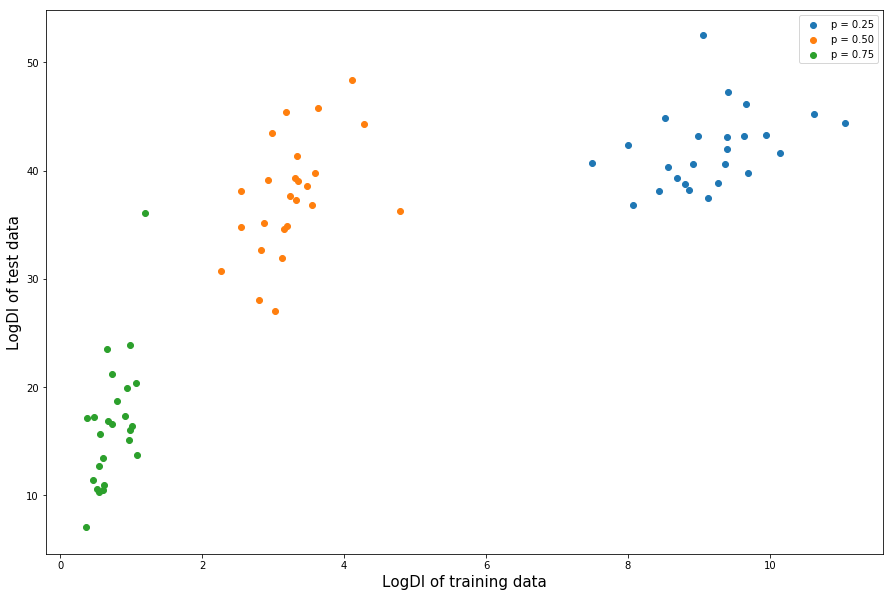

In [7]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(pert_results[pert_results.p==0.25].logDI_train, pert_results[pert_results.p==0.25].logDI_test, \
           label="p = 0.25")
ax1.scatter(pert_results[pert_results.p==0.50].logDI_train, pert_results[pert_results.p==0.50].logDI_test, \
           label="p = 0.50")
ax1.scatter(pert_results[pert_results.p==0.75].logDI_train, pert_results[pert_results.p==0.75].logDI_test, \
           label="p = 0.75")

# plt.title("", fontsize=20)
plt.xlabel("LogDI of training data", fontsize=15)
plt.ylabel("LogDI of test data", fontsize=15)
plt.legend()

plt.show()
plt.savefig('figures/logDItrainvstest.png', bbox_inches='tight')